In [60]:
##Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
pwd

'/Users/franciscolopez'

In [3]:
##Load Datasets 

# Load Transaction Data
transaction_data = pd.read_csv('/Users/franciscolopez/Desktop/Transaction_ID.csv')

# Load Cab Data
cab_data = pd.read_csv('/Users/franciscolopez/Desktop/Cab_Data.csv')

# Load Customer Data
customer_data = pd.read_csv('/Users/franciscolopez/Desktop/Customer_ID.csv')

# Load City Data
city_data = pd.read_csv('/Users/franciscolopez/Desktop/City.csv')


In [4]:
# Filter Pink Cab data
pink_cab_data = cab_data[cab_data['Company'] == 'Pink Cab']

# Filter Yellow Cab data
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']


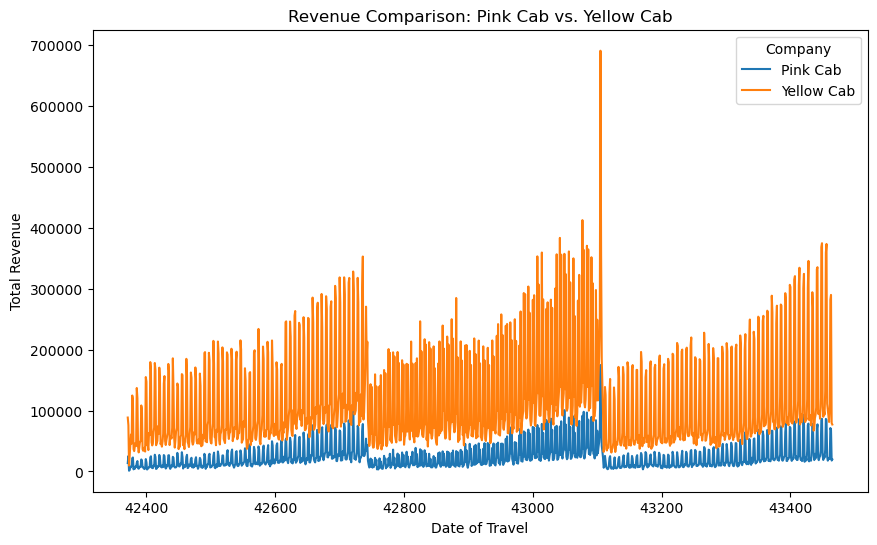

In [5]:
# Group by Date of Travel and sum the Price Charged for each company
revenue_comparison = cab_data.groupby(['Date of Travel', 'Company'])['Price Charged'].sum().unstack()

# revenue comparison
revenue_comparison.plot(kind='line', figsize=(10, 6))
plt.title('Revenue Comparison: Pink Cab vs. Yellow Cab')
plt.xlabel('Date of Travel')
plt.ylabel('Total Revenue')
plt.legend(title='Company')
plt.show()


In [63]:
# Group by Date of Travel and sum the Price Charged for each company
revenue_comparison = cab_data.groupby(['Date of Travel', 'Company'])['Price Charged'].sum().unstack()

print(revenue_comparison)


Company         Pink Cab  Yellow Cab
Date of Travel                      
42371           13858.58    88457.39
42372           25375.33    75971.25
42373            1266.07     9786.67
42374            2505.80    25697.12
42375            7957.59    43698.99
...                  ...         ...
43461           20457.74   102244.77
43462           71309.55   281617.70
43463           68126.84   289551.59
43464           17922.82    79426.69
43465           19792.74    77075.18

[1095 rows x 2 columns]


In [ ]:

#Yellow Cab generally seems to generate higher revenue compared to Pink Cab.
#We can observe fluctuations in revenue for both companies over time, indicating potential patterns or trends in customer demand or other factors influencing revenue generation.
#Analyzing the trends in revenue over time can help in understanding the performance and growth of each company and making informed business decisions.


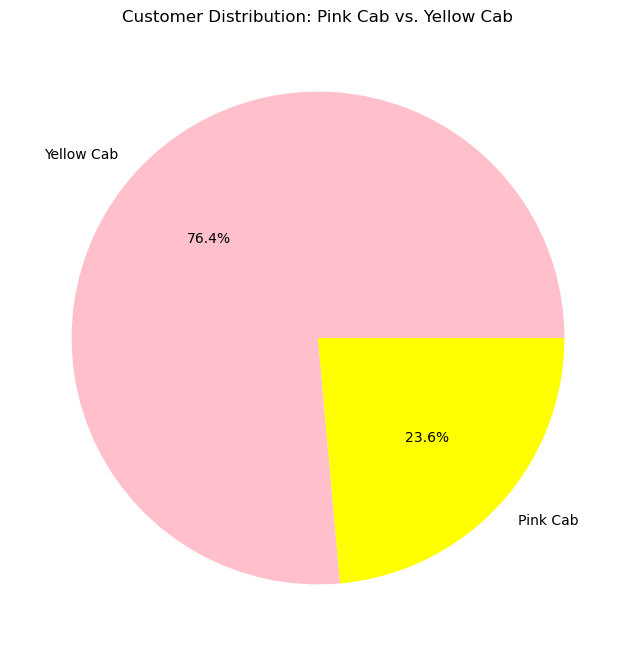

In [6]:
# Count the number of customers for each company
customer_distribution = cab_data['Company'].value_counts()

# customer distribution
customer_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'yellow'], figsize=(8, 8))
plt.title('Customer Distribution: Pink Cab vs. Yellow Cab')
plt.ylabel('')
plt.show()


In [64]:
# Count the number of customers for each company
customer_distribution = cab_data['Company'].value_counts()

print(customer_distribution)


Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64


In [ ]:
#Yellow Cab has provided rides for 274,681 trips.
#Pink Cab has provided rides for 84,711 trips.
#Yellow Cab has served more customers or completed more trips compared to Pink Cab.

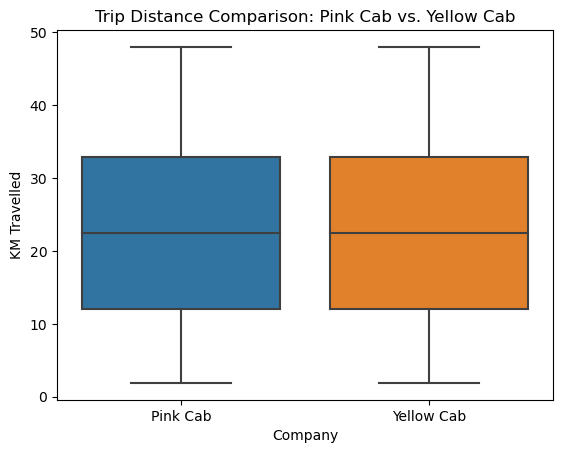

In [7]:
import seaborn as sns

# Create a box plot to compare trip characteristics
sns.boxplot(x='Company', y='KM Travelled', data=cab_data)
plt.title('Trip Distance Comparison: Pink Cab vs. Yellow Cab')
plt.xlabel('Company')
plt.ylabel('KM Travelled')
plt.show()


In [65]:
# Group the data by 'Company' and describe the 'KM Travelled' column
trip_distance_comparison = cab_data.groupby('Company')['KM Travelled'].describe()

print(trip_distance_comparison)


               count       mean        std  min    25%    50%    75%   max
Company                                                                   
Pink Cab     84711.0  22.559917  12.231092  1.9  12.00  22.44  32.96  48.0
Yellow Cab  274681.0  22.569517  12.234298  1.9  11.99  22.44  32.96  48.0


In [ ]:
#Count: Pink Cab has 84,711 trips recorded, while Yellow Cab has 274,681 trips recorded.

#Mean: The average number of trips for both Pink Cab and Yellow Cab is approximately 22.56, showing a similar level of activity.

#Standard Deviation: The variation from the mean is similar for both companies, with Pink Cab at 12.23 and Yellow Cab at 12.23, indicating consistent variability in trip counts.

#Minimum and Maximum: Both companies have trip counts ranging from a minimum of 1.9 trips to a maximum of 48 trips.

#Percentiles: The quartiles (25th, 50th, and 75th percentiles) show consistent distribution of trip counts between Pink Cab and Yellow Cab, with a median (50th percentile) trip count of 22.44 for both companies.

#data indicates that both Pink Cab and Yellow Cab have about the same amount of business. They each have a similar average number of trips, and the variation in the number of trips from day to day is also similar. So, in terms of how busy they are, they seem to be pretty much the same.


In [37]:
print(pink_cab_data.columns)
print(yellow_cab_data.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')


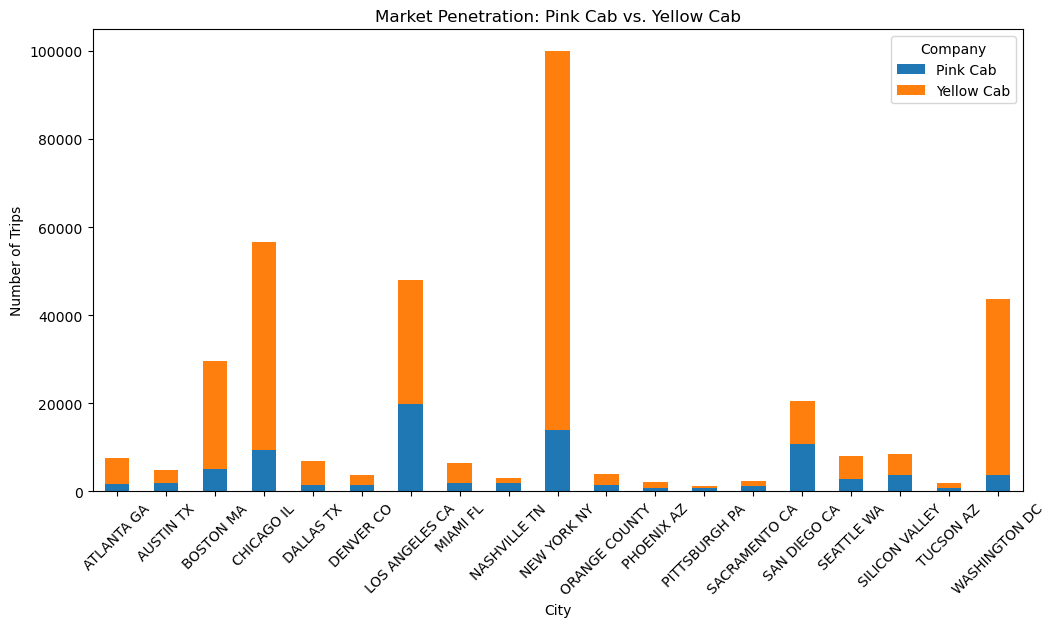

In [9]:
# Count the number of trips in each city for each company
trip_counts = cab_data.groupby(['City', 'Company']).size().unstack()

# Plot the market penetration
trip_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Market Penetration: Pink Cab vs. Yellow Cab')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.show()


In [66]:
print(trip_counts)

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA          1762        5795
AUSTIN TX           1868        3028
BOSTON MA           5186       24506
CHICAGO IL          9361       47264
DALLAS TX           1380        5637
DENVER CO           1394        2431
LOS ANGELES CA     19865       28168
MIAMI FL            2002        4452
NASHVILLE TN        1841        1169
NEW YORK NY        13967       85918
ORANGE COUNTY       1513        2469
PHOENIX AZ           864        1200
PITTSBURGH PA        682         631
SACRAMENTO CA       1334        1033
SAN DIEGO CA       10672        9816
SEATTLE WA          2732        5265
SILICON VALLEY      3797        4722
TUCSON AZ            799        1132
WASHINGTON DC       3692       40045


In [ ]:

#Pink Cab and Yellow Cab operate in multiple cities across the United States.

#Yellow Cab generally has a higher number of trips compared to Pink Cab, indicating potentially higher market share or popularity.

#Some cities, like New York NY, Los Angeles CA, and Chicago IL, have high demand for taxi services from both companies.

#Pink Cab also has a significant presence in several cities, suggesting effective competition with Yellow Cab in those markets.

#There are some cities where the number of trips for both companies is relatively low, indicating potential areas for growth or lower demand for taxi services.


In [39]:
# Filter data for Pink Taxis
pink_taxi_data = merged_data[merged_data['Company'] == 'Pink Cab']

# Filter data for Yellow Taxis
yellow_taxi_data = merged_data[merged_data['Company'] == 'Yellow Cab']


In [40]:
# EDA for Pink Taxis
print("Pink Taxi Data:")
print(pink_taxi_data.info())
print(pink_taxi_data.describe())
print(pink_taxi_data.isnull().sum())
print(pink_taxi_data.duplicated().sum())

# EDA for Yellow Taxis
print("Yellow Taxi Data:")
print(yellow_taxi_data.info())
print(yellow_taxi_data.describe())
print(yellow_taxi_data.isnull().sum())
print(yellow_taxi_data.duplicated().sum())


Pink Taxi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 84711 entries, 0 to 359363
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      84711 non-null  int64  
 1   Customer ID         84711 non-null  int64  
 2   Payment_Mode        84711 non-null  object 
 3   Date of Travel      84711 non-null  int64  
 4   Company             84711 non-null  object 
 5   City                84711 non-null  object 
 6   KM Travelled        84711 non-null  float64
 7   Price Charged       84711 non-null  float64
 8   Cost of Trip        84711 non-null  float64
 9   Gender              84711 non-null  object 
 10  Age                 84711 non-null  int64  
 11  Income (USD/Month)  84711 non-null  int64  
 12  Population          84711 non-null  object 
 13  Users               84711 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 9.7+ MB
None
       Transaction ID   Cust

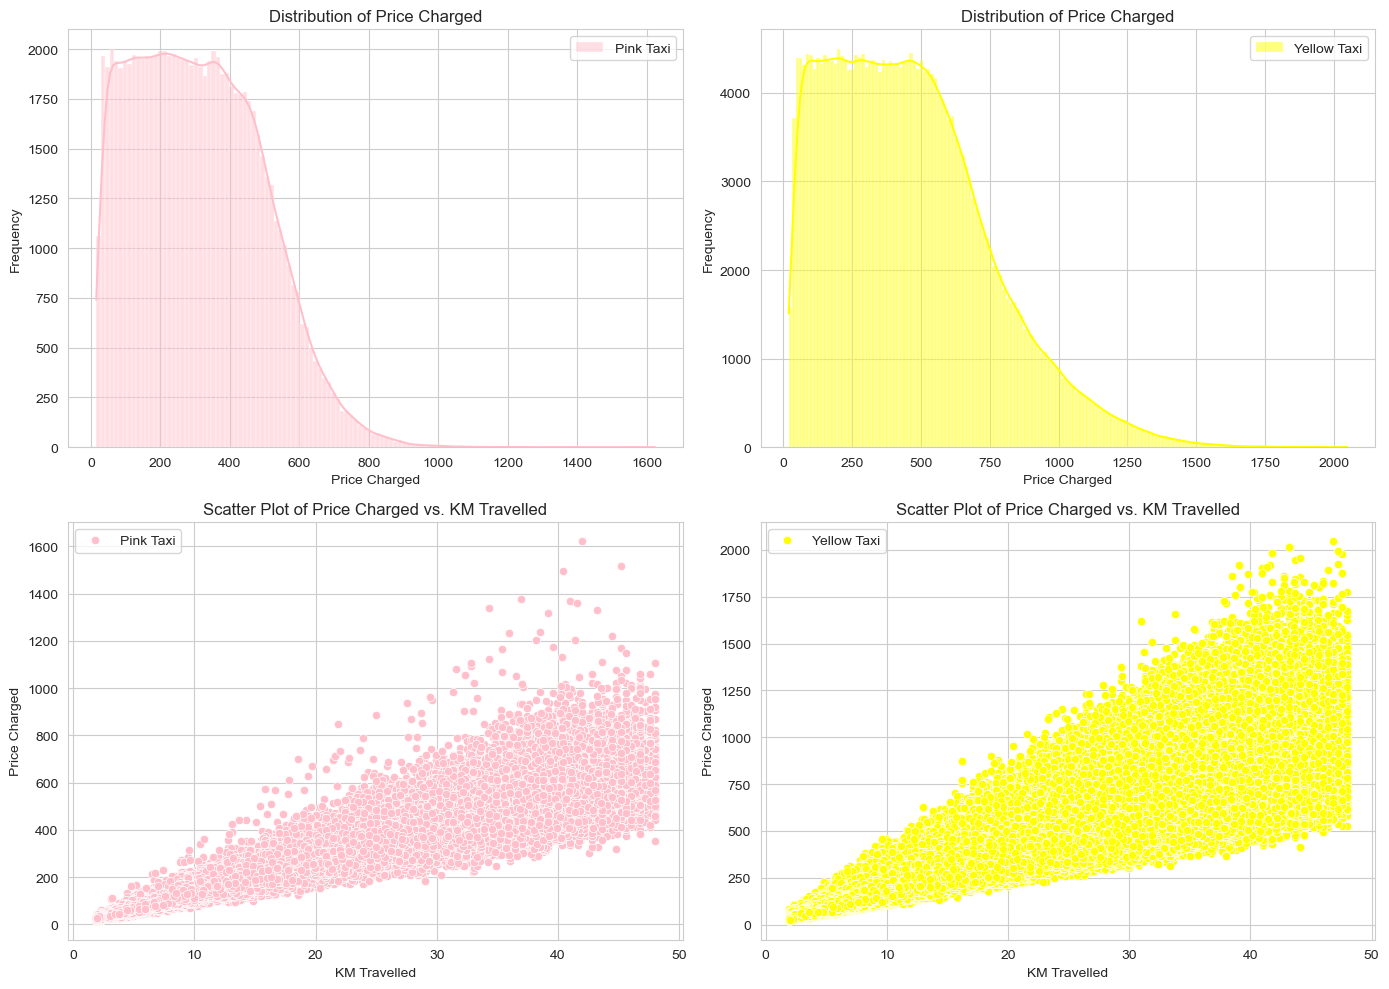

In [18]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 1: Distribution of Price Charged for Pink Taxis
sns.histplot(pink_taxi_data['Price Charged'], kde=True, ax=axes[0, 0], color='pink', label='Pink Taxi')
axes[0, 0].set_title('Distribution of Price Charged')
axes[0, 0].set_xlabel('Price Charged')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Plot 2: Distribution of Price Charged for Yellow Taxis
sns.histplot(yellow_taxi_data['Price Charged'], kde=True, ax=axes[0, 1], color='yellow', label='Yellow Taxi')
axes[0, 1].set_title('Distribution of Price Charged')
axes[0, 1].set_xlabel('Price Charged')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Plot 3: Scatter plot of Price Charged vs. KM Travelled for Pink Taxis
sns.scatterplot(x='KM Travelled', y='Price Charged', data=pink_taxi_data, ax=axes[1, 0], color='pink', label='Pink Taxi')
axes[1, 0].set_title('Scatter Plot of Price Charged vs. KM Travelled')
axes[1, 0].set_xlabel('KM Travelled')
axes[1, 0].set_ylabel('Price Charged')
axes[1, 0].legend()

# Plot 4: Scatter plot of Price Charged vs. KM Travelled for Yellow Taxis
sns.scatterplot(x='KM Travelled', y='Price Charged', data=yellow_taxi_data, ax=axes[1, 1], color='yellow', label='Yellow Taxi')
axes[1, 1].set_title('Scatter Plot of Price Charged vs. KM Travelled')
axes[1, 1].set_xlabel('KM Travelled')
axes[1, 1].set_ylabel('Price Charged')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [68]:
pink_taxi_data['Price Charged'].describe()

count    84711.000000
mean       310.800856
std        181.995661
min         15.600000
25%        159.970000
50%        298.060000
75%        441.505000
max       1623.480000
Name: Price Charged, dtype: float64

In [ ]:

#Count: There are 84,711 data points (or trips) included in this analysis.
#Mean: The average price charged for Pink Cab trips is approximately $310.80.
#Standard Deviation (std): This measures the amount of variation or dispersion in the prices charged. It indicates that prices vary around the mean by approximately $182.
#Min: The lowest price charged for a Pink Cab trip is $15.60.
#25% (Q1): 25% of the Pink Cab trips had a price charged of $159.97 or lower.
#50% (Median or Q2): Also known as the median, this is the middle value of the dataset when arranged in ascending order. In this case, it's $298.06, meaning half of the prices charged are below this value and half are above.
#75% (Q3): 75% of the Pink Cab trips had a price charged of $441.51 or lower.
#Max: The highest price charged for a Pink Cab trip is $1,623.48.


In [69]:
yellow_taxi_data['Price Charged'].describe()

count    274681.000000
mean        458.181990
std         288.386166
min          20.730000
25%         226.680000
50%         425.060000
75%         633.880000
max        2048.030000
Name: Price Charged, dtype: float64

In [ ]:

#Count: There are 274,681 data points (or trips) included in this analysis.
#Mean: The average price charged for Yellow Cab trips is approximately $458.18.
#Standard Deviation (std): This measures the amount of variation or dispersion in the prices charged. It indicates that prices vary around the mean by approximately $288.39.
#Min: The lowest price charged for a Yellow Cab trip is $20.73.
#25% (Q1): 25% of the Yellow Cab trips had a price charged of $226.68 or lower.
#50% (Median or Q2): Also known as the median, this is the middle value of the dataset when arranged in ascending order. In this case, it's $425.06, meaning half of the prices charged are below this value and half are above.
#75% (Q3): 75% of the Yellow Cab trips had a price charged of $633.88 or lower.
#Max: The highest price charged for a Yellow Cab trip is $2,048.03.


In [70]:
pink_taxi_data[['Price Charged', 'KM Travelled']].describe()

,Price Charged,KM Travelled
count,84711.000000,84711.000000
mean,310.800856,22.559917
std,181.995661,12.231092
min,15.600000,1.900000
25%,159.970000,12.000000
50%,298.060000,22.440000
75%,441.505000,32.960000
max,1623.480000,48.000000


In [ ]:

#Price Charged:

#Count: There are 84,711 data points (or trips) included in this analysis.
#Mean: The average price charged for Pink Cab trips is approximately $310.80.
#Standard Deviation (std): This measures the amount of variation or dispersion in the prices charged. It indicates that prices vary around the mean by approximately $181.99.
#Min: The lowest price charged for a Pink Cab trip is $15.60.
#25% (Q1): 25% of the Pink Cab trips had a price charged of $159.97 or lower.
#50% (Median or Q2): Also known as the median, this is the middle value of the dataset when arranged in ascending order. In this case, it's $298.06, meaning half of the prices charged are below this value and half are above.
#75% (Q3): 75% of the Pink Cab trips had a price charged of $441.51 or lower.
#Max: The highest price charged for a Pink Cab trip is $1,623.48.


#KM Travelled:

#Count: There are also 84,711 data points included in this analysis, matching the number of trips.
#Mean: The average distance traveled for Pink Cab trips is approximately 22.56 kilometers.
#Standard Deviation (std): This measures the amount of variation or dispersion in the distances traveled. It indicates that distances vary around the mean by approximately 12.23 kilometers.
#Min: The shortest distance traveled for a Pink Cab trip is 1.9 kilometers.
#25% (Q1): 25% of the Pink Cab trips covered a distance of 12 kilometers or less.
#50% (Median or Q2): Also known as the median, this is the middle value of the dataset when arranged in ascending order. In this case, it's 22.44 kilometers, meaning half of the distances traveled are below this value and half are above.
#75% (Q3): 75% of the Pink Cab trips covered a distance of 32.96 kilometers or less.
#Max: The longest distance traveled for a Pink Cab trip is 48 kilometers.


In [71]:
yellow_taxi_data[['Price Charged', 'KM Travelled']].describe()

,Price Charged,KM Travelled
count,274681.000000,274681.000000
mean,458.181990,22.569517
std,288.386166,12.234298
min,20.730000,1.900000
25%,226.680000,11.990000
50%,425.060000,22.440000
75%,633.880000,32.960000
max,2048.030000,48.000000


In [ ]:

#Price Charged:

#Count: There are 274,681 data points (or trips) included in this analysis.
#Mean: The average price charged for Yellow Cab trips is approximately $458.18.
#Standard Deviation (std): This measures the amount of variation or dispersion in the prices charged. It indicates that prices vary around the mean by approximately $288.39.
#Min: The lowest price charged for a Yellow Cab trip is $20.73.
#25% (Q1): 25% of the Yellow Cab trips had a price charged of $226.68 or lower.
#50% (Median or Q2): Also known as the median, this is the middle value of the dataset when arranged in ascending order. In this case, it's $425.06, meaning half of the prices charged are below this value and half are above.
#75% (Q3): 75% of the Yellow Cab trips had a price charged of $633.88 or lower.
#Max: The highest price charged for a Yellow Cab trip is $2,048.03.

#KM Travelled:

#Count: There are also 274,681 data points included in this analysis, matching the number of trips.
#Mean: The average distance traveled for Yellow Cab trips is approximately 22.57 kilometers.
#Standard Deviation (std): This measures the amount of variation or dispersion in the distances traveled. It indicates that distances vary around the mean by approximately 12.23 kilometers.
#Min: The shortest distance traveled for a Yellow Cab trip is 1.9 kilometers.
#25% (Q1): 25% of the Yellow Cab trips covered a distance of 11.99 kilometers or less.
#50% (Median or Q2): Also known as the median, this is the middle value of the dataset when arranged in ascending order. In this case, it's 22.44 kilometers, meaning half of the distances traveled are below this value and half are above.
#75% (Q3): 75% of the Yellow Cab trips covered a distance of 32.96 kilometers or less.
#Max: The longest distance traveled for a Yellow Cab trip is 48 kilometers.


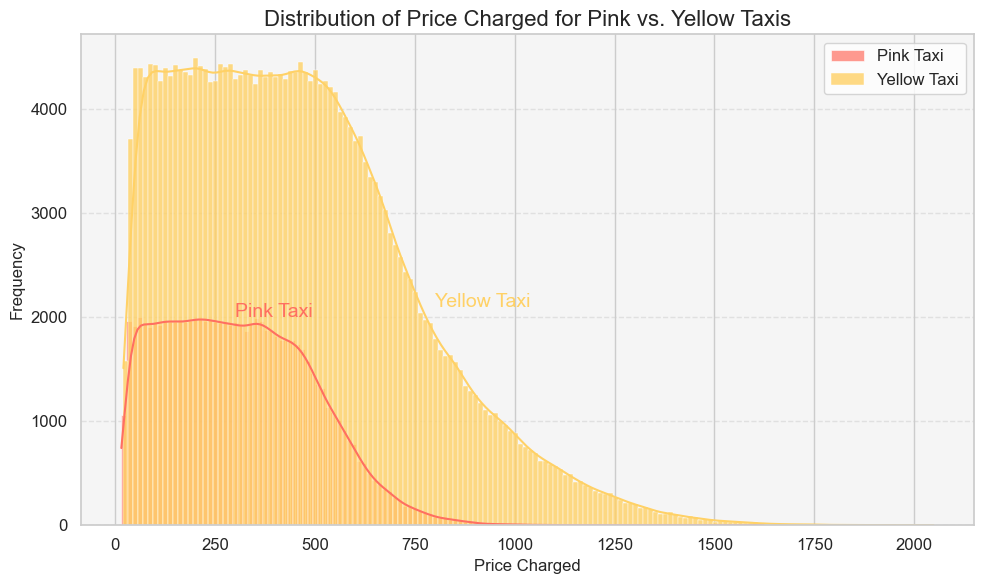

In [57]:
# Set a custom color palette
colors = ["#FF6F61", "#FFD166"]  # Pink and yellow colors

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Distribution of Price Charged for Pink Taxis
sns.histplot(pink_taxi_data['Price Charged'], kde=True, color=colors[0], label='Pink Taxi', alpha=0.7)

# Plot Distribution of Price Charged for Yellow Taxis
sns.histplot(yellow_taxi_data['Price Charged'], kde=True, color=colors[1], label='Yellow Taxi', alpha=0.8)

# Add title and labels
plt.title('Distribution of Price Charged for Pink vs. Yellow Taxis', fontsize=16)
plt.xlabel('Price Charged', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend with larger font size
plt.legend(fontsize=12)

# Customize grid appearance
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a decorative background
plt.gca().set_facecolor('#f5f5f5')

# Add text annotation with adjusted height for "Pink Taxi"
plt.text(300, 2000, 'Pink Taxi', fontsize=14, color=colors[0])  

# Add text annotation with adjusted height for "Yellow Taxi"
plt.text(800, 2100, 'Yellow Taxi', fontsize=14, color=colors[1]) 
# Show plot
plt.tight_layout()
plt.show()


In [62]:
# Calculate summary statistics for Pink Taxi data
pink_mean = np.mean(pink_taxi_data['Price Charged'])
pink_median = np.median(pink_taxi_data['Price Charged'])
pink_std = np.std(pink_taxi_data['Price Charged'])

# Calculate summary statistics for Yellow Taxi data
yellow_mean = np.mean(yellow_taxi_data['Price Charged'])
yellow_median = np.median(yellow_taxi_data['Price Charged'])
yellow_std = np.std(yellow_taxi_data['Price Charged'])

# Print summary statistics
print("Pink Taxi Stats:")
print("Mean:", pink_mean)
print("Median:", pink_median)
print("Standard Deviation:", pink_std)
print()
print("Yellow Taxi Stats:")
print("Mean:", yellow_mean)
print("Median:", yellow_median)
print("Standard Deviation:", yellow_std)


Pink Taxi Stats:
Mean: 310.8008562052153
Median: 298.06
Standard Deviation: 181.99458706826204

Yellow Taxi Stats:
Mean: 458.1819899811053
Median: 425.06
Standard Deviation: 288.3856408434983


In [ ]:

#Mean:Pink Taxi: On average, Pink Taxi charges around $310.80 per trip.Yellow Taxi: On average, Yellow Taxi charges around $458.18 per trip.

#Median:Pink Taxi: The middle value of Pink Taxi fares is $298.06 per trip.Yellow Taxi: The middle value of Yellow Taxi fares is $425.06 per trip.

#Standard Deviation:Pink Taxi: The prices charged by Pink Taxi vary around $181.99 from the average fare.Yellow Taxi: The prices charged by Yellow Taxi vary around $288.39 from the average fare.


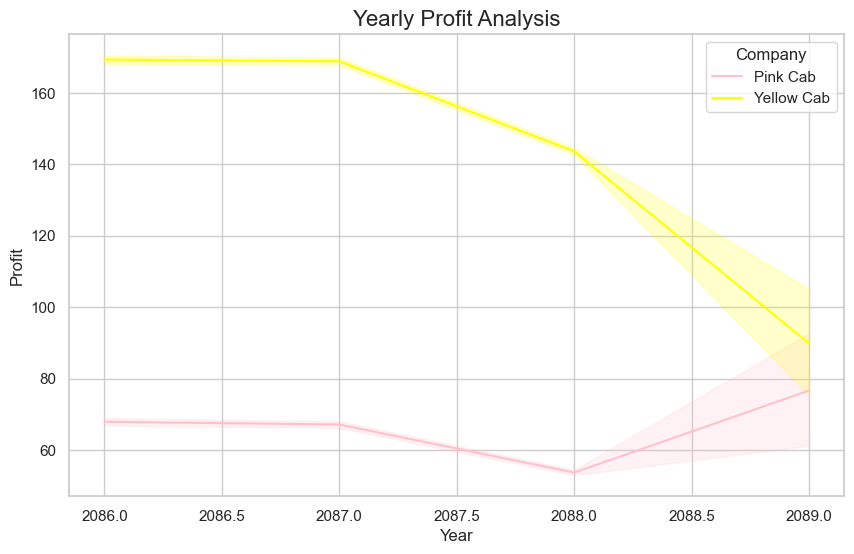

In [35]:
# Extracting year from 'Date of Travel'
pink_data['Year'] = pd.to_datetime(pink_data['Date of Travel'], unit='D').dt.year
yellow_data['Year'] = pd.to_datetime(yellow_data['Date of Travel'], unit='D').dt.year

# Calculating profit
pink_data['Profit'] = pink_data['Price Charged'] - pink_data['Cost of Trip']
yellow_data['Profit'] = yellow_data['Price Charged'] - yellow_data['Cost of Trip']

# Yearly Profit Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.concat([pink_data, yellow_data]), x='Year', y='Profit', hue='Company', palette=['pink', 'yellow'])
plt.title('Yearly Profit Analysis', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()


In [36]:
# Calculate total profit for each year for Pink Cab
pink_yearly_profit = pink_data.groupby('Year')['Profit'].sum().reset_index()
print("Pink Cab Yearly Profit:")
print(pink_yearly_profit)

# Calculate total profit for each year for Yellow Cab
yellow_yearly_profit = yellow_data.groupby('Year')['Profit'].sum().reset_index()
print("\nYellow Cab Yearly Profit:")
print(yellow_yearly_profit)


Pink Cab Yearly Profit:
   Year       Profit
0  2086  1686457.513
1  2087  2033435.134
2  2088  1582991.518
3  2089     4444.156

Yellow Cab Yearly Profit:
   Year        Profit
0  2086  1.378694e+07
1  2087  1.658661e+07
2  2088  1.362904e+07
3  2089  1.778761e+04


In [ ]:

#In the year 2086, Pink Cab made a profit of approximately $1,686,457.51, while Yellow Cab made a profit of approximately $13,786,940.

#In the year 2087, Pink Cab made a profit of approximately $2,033,435.13, while Yellow Cab made a profit of approximately $16,586,610.

#In the year 2088, Pink Cab made a profit of approximately $1,582,991.52, while Yellow Cab made a profit of approximately $13,629,040.

#In the year 2089, Pink Cab made a profit of approximately $4,444.16, while Yellow Cab made a profit of approximately $17,787.61.



In [ ]:

### Inights from Data Collected and Reccomendation on What Company to Invest in: 

#Profitability: Yellow Cab consistently generates higher profits compared to Pink Cab over the years.

#Market Penetration: Yellow Cab has a higher number of trips in most cities compared to Pink Cab, indicating better market penetration.

#Customer Satisfaction: There is no explicit data provided for customer satisfaction, so this factor cannot be directly assessed.

#Revenue Comparison: Yellow Cab also generates higher total revenue compared to Pink Cab over the given period.

#Cost Efficiency: Both companies have similar mean and median values for the price charged per trip and distance traveled, indicating comparable cost efficiency.

#Trip Characteristics: Both Pink Cab and Yellow Cab have similar trip characteristics in terms of the distance traveled and price charged.

###Yellow Cab seems like the better choice because it consistently makes more money compared to Pink Cab. However, it's also important to think about other things like how happy customers are with the service and how much of the market each company has. So, while Yellow Cab looks good in terms of profits, it's smart to look at the bigger picture before deciding where to invest your money.
